Support Vector Machines are powerful machine learning models that can make complex decision boundaries. An SVM’s decision boundary can twist and curve to accommodate the training data.

In this project, we will use an SVM trained using a baseball dataset to find the decision boundary of the strike zone.

The strike zone can be thought of as a decision boundary that determines whether or not a pitch is a strike or a ball. There is a strict definition of the strike zone: however, in practice, it will vary depending on the umpire or the player at bat.

Let’s use our knowledge of SVMs to find the real strike zone of several baseball players.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
C:\Users\Parnashri\Anaconda_3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


<h3>Data</h3>

We have imported DataFrames related to some of baseball’s biggest stars. We have data on Aaron Judge and G. Stanton. Judge is one of the tallest players in the league. Their strike zones should be pretty similar!

In [2]:
aaron_judge = pd.read_csv('aaron_judge.csv')

In [3]:
aaron_judge.columns

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'pos2_person_id', 'umpire',
       'sv_id', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pos1_person_id',
       'pos2_person_id.1', 'pos3_person_id', 'pos4_person_id',
       'pos5_person_id', 'pos6_person_id', 'pos7_person_id', 'pos8_person_id',

Some of these features have obscure names. Let’s learn what the feature description means.

In [4]:
aaron_judge.description.unique()

array(['swinging_strike', 'called_strike', 'ball', 'hit_into_play_score',
       'foul', 'blocked_ball', 'hit_into_play', 'hit_into_play_no_out',
       'swinging_strike_blocked', 'foul_tip', 'automatic_ball',
       'hit_by_pitch'], dtype=object)

We’re interested in looking at whether a pitch was a ball or a strike. That information is stored in the type feature.

In [5]:
aaron_judge.type.unique()

array(['S', 'B', 'X'], dtype=object)

We know every row’s type feature is either an 'S' for a strike, a 'B' for a ball, or an 'X' for neither (for example, an 'X' could be a hit or an out).

We’ll want to use this feature as the label of our data points. However, instead of using strings, it will be easier if we change every 'S' to 1 and every 'B' to a 0.

In [6]:
aaron_judge['type'] = aaron_judge['type'].map({'S':1, 'B':0})
aaron_judge.type

0       1.0
1       1.0
2       1.0
3       0.0
4       1.0
       ... 
3431    0.0
3432    NaN
3433    0.0
3434    1.0
3435    1.0
Name: type, Length: 3436, dtype: float64

<h3>Plotting the pitches</h3>

There were some NaNs in there. We will take care of those in a second. For now, let’s look at the other features we are interested in.

We want to predict whether a pitch is a ball or a strike based on its location over the plate. The ball’s location can be found in the columns plate_x and plate_z.

In [7]:
aaron_judge.plate_x

0       1.0150
1       0.4546
2       0.0957
3       1.5161
4       0.0764
         ...  
3431    0.7390
3432   -0.4190
3433    0.5610
3434   -0.8030
3435   -0.2730
Name: plate_x, Length: 3436, dtype: float64

plate_x measures how far left or right the pitch is from the center of home plate. If plate_x = 0, that means the pitch was directly in the middle of the home plate.

We now have the three columns we want to work with: 'plate_x', 'plate_z', and 'type'. Let’s remove every row that has a NaN in any of those columns.

In [8]:
aaron_judge = aaron_judge.dropna(subset=['type','plate_x','plate_z'])

<h3>Plotting</h3>

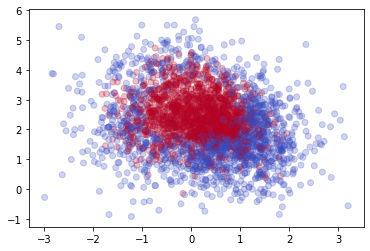

In [9]:
plt.scatter(x= aaron_judge.plate_x, y=aaron_judge.plate_z, c=aaron_judge.type, cmap= plt.cm.coolwarm, alpha=0.25)

plate_z measures how high off the ground the pitch was. If plate_z = 0, that means the pitch was at ground level when it got to the home plate.

<h3>Building the SVM</h3>

Now that we’ve seen the location of every pitch, let’s create an SVM to create a decision boundary. This decision boundary will be the real strike zone for that player. 

To begin, we want to validate our model, so we need to split the data into a training set and a validation set.

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
training_set, validation_set = train_test_split(aaron_judge, train_size = 0.8, random_state =1)

In [12]:
from sklearn.svm import SVC

In [13]:
classifier = SVC(kernel='rbf', gamma=1, C=3)

In [14]:
classifier.fit(training_set[['plate_x', 'plate_z']], training_set.type)

SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

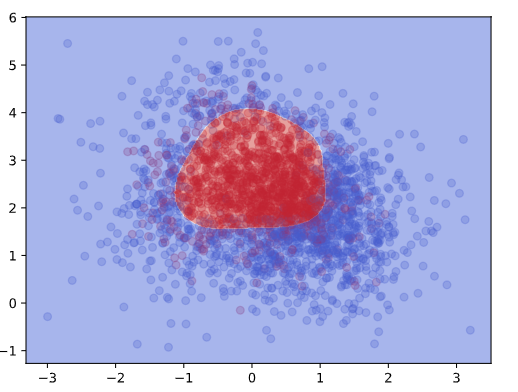

In [15]:
from IPython.display import Image
Image(filename='1.png')

This shows the predicted strike zone.

<h3>Optimizing the SVM</h3>

In [16]:
classifier.score(validation_set[['plate_x', 'plate_z']], validation_set.type)

0.8424543946932007

Let’s change some of the SVM’s parameters to see if we can get better accuracy.

In [17]:
classifier2 = SVC(kernel='rbf', gamma=100, C=100)
classifier2.fit(training_set[['plate_x', 'plate_z']], training_set.type)
classifier2.score(validation_set[['plate_x', 'plate_z']], validation_set.type)

0.7744610281923715

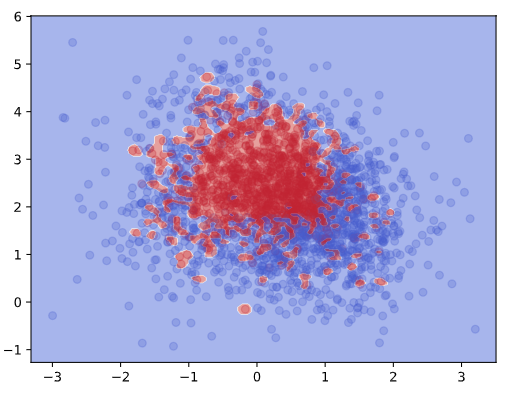

In [18]:
Image(filename='2.png')

Trying to find a configuration of gamma and C that greatly improves the accuracy, by using nested for loops.

In [19]:
largest = {'value':0, 'gamma':1, 'C':1}
for gamma in range(1,5):
    for C in range(1,5):
        classifier = SVC(kernel='rbf', gamma=gamma, C=C)
        classifier.fit(training_set[['plate_x', 'plate_z']], training_set.type)
        score = classifier.score(validation_set[['plate_x', 'plate_z']], validation_set.type)
        if(score>largest['value']):
            largest['value'] = score
            largest['gamma'] = gamma
            largest['C'] = C            

In [20]:
largest

{'value': 0.8490878938640133, 'gamma': 1, 'C': 1}

<h3>Exploring Other Players</h3>

We have created a function for simplifying purpose.

In [21]:
def find_strike_zone(dataset):  
    dataset['type'] = dataset['type'].map({'S':1, 'B':0})
    dataset = dataset.dropna(subset=['type','plate_x','plate_z'])
    plt.scatter(x= dataset.plate_x, y=dataset.plate_z, c=dataset.type, cmap= plt.cm.coolwarm, alpha=0.25)
    training_set, validation_set = train_test_split(dataset, train_size = 0.8, random_state=1)
    classifier = SVC(kernel='rbf', gamma=1, C=1)
    classifier.fit(training_set[['plate_x', 'plate_z']], training_set.type)
    score = classifier.score(validation_set[['plate_x', 'plate_z']], validation_set.type)
    score

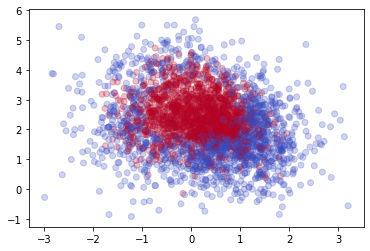

In [22]:
aaron_judge = pd.read_csv('aaron_judge.csv')
find_strike_zone(aaron_judge)

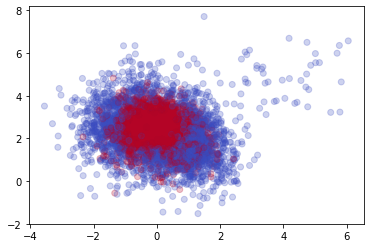

In [23]:
stanton = pd.read_csv('stanton.csv')
find_strike_zone(stanton)